<a href="https://colab.research.google.com/github/ChoHyeonJun86/First-Project/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2C_%EB%AA%A8%EB%8D%B8%EA%B5%AC%EC%A1%B0_%EB%B0%8F_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

file_path_trash_cans = '/content/drive/MyDrive/머신러닝 데이터셋/서울특별시 관악구 생활폐기물 처리정보_20240826.csv'
file_path_population = '/content/drive/MyDrive/머신러닝 데이터셋/인구밀도_20250603084042.csv'
file_path_waste = '/content/drive/MyDrive/머신러닝 데이터셋/생활계폐기물+발생량+및+처리현황_20250603084105.csv'

df_trash_cans = pd.read_csv(file_path_trash_cans, encoding='cp949')

df_trash_cans.head()

,설치동,설치주소,상세위치
0,대학동,서울특별시 관악구 관악로 1,서울대학교 정문
1,대학동,서울특별시 관악구 관악로 1,서울대학교 정문
2,청룡동,서울특별시 관악구 관악로 133,건영6차아파트 앞
3,낙성대동,서울특별시 관악구 관악구 신림동 147-2,관악서울대학교 치과병원 부근
4,낙성대동,서울특별시 관악구 관악구 신림동 147-2,관악서울대학교 치과병원 부근


In [ ]:
df_population = pd.read_csv(file_path_population)
df_population.head()

,동별(1),동별(2),동별(3),2024,2024.1,2024.2
0,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
1,합계,소계,소계,9597372,605.21,15858
2,합계,종로구,소계,149608,23.91,6256
3,합계,중구,소계,131214,9.96,13174
4,합계,용산구,소계,217194,21.87,9932


In [ ]:
df_waste = pd.read_csv(file_path_waste)
df_waste.head()

,구분별(1),구분별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6
0,구분별(1),구분별(2),발생량,재활용,재활용,재활용,소각,매립,기타
1,구분별(1),구분별(2),소계,소계,재활용,음식물,소계,소계,소계
2,계,소계,10426.9,6544.7,4128.7,2416.0,2423.0,729.8,729.4
3,계,처리비율 (%),100.0,62.8,39.6,23.2,23.2,7.0,7.0
4,계,종로구,266.9,149.7,69.8,79.9,98.0,15.5,3.7


In [ ]:
df_trash_cans.isnull().sum()

,0
설치동,0
설치주소,0
상세위치,0


In [ ]:
df_population.isnull().sum()

,0
동별(1),0
동별(2),0
동별(3),0
2024,0
2024.1,0
2024.2,0


In [ ]:
df_waste.isnull().sum()

,0
구분별(1),0
구분별(2),0
2023,0
2023.1,0
2023.2,0
2023.3,0
2023.4,0
2023.5,0
2023.6,0


In [60]:
import pandas as pd
base_path = "/content/drive/MyDrive/머신러닝 데이터셋/"

file_paths = {
    "waste_generation": base_path + "생활계폐기물+발생량+및+처리현황_20250603084105.csv",
    "seoul_roads": base_path + "서울시 도시계획시설(도로) 공간정보.csv",
    "seoul_facilities": base_path + "서울시 시설물 정보.csv",
    "gwanak_waste_bins": base_path + "서울특별시 관악구 생활폐기물 처리정보_20240826.csv",
    "gwanak_streetlights": base_path + "서울특별시 관악구_가로등 현황_20240722.csv",
    "gwanak_population": base_path + "서울특별시 관악구_행정동별 인구정보_20240830.csv",
    "population_density": base_path + "인구밀도_20250603084042.csv"
}

# 각 파일을 순회하며 기본적인 정보 확인 및 전처리 아이디어 제시
for key, file_path in file_paths.items():
    print(f"--- 파일 처리 중: {file_path} ({key}) ---")
    try:

        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')

        print(f"\n[ {file_path} ] 데이터 샘플 (상위 5개 행):")
        print(df.head())

        print(f"\n[ {file_path} ] 데이터 정보:")
        df.info()

        print(f"\n[ {file_path} ] 결측치 현황:")
        print(df.isnull().sum())
        print("-" * 50)

        # --- 각 파일별 특화된 전처리 아이디어 및 주요 컬럼 식별 ---

        if key == "gwanak_waste_bins":
            print(">>> 'gwanak_waste_bins' (관악구 생활폐기물 처리정보) 주요 컬럼 및 전처리 아이디어:")
            print("- 주요 컬럼 예상: '설치위치'(주소), '위도', '경도', '쓰레기통 종류' 등")
            print("- 전처리: 위도/경도 데이터 타입 숫자형 변환, 주소 데이터 정제, 결측치 처리.")
            print("- 활용: K-평균 클러스터링의 기본 입력 데이터 (기존 쓰레기통 위치).")
            # 예시: 위도, 경도 컬럼이 있는지 확인
            if '위도' in df.columns and '경도' in df.columns:
                print("   '위도', '경도' 컬럼 확인됨.")
                # 위도, 경도 컬럼을 숫자형으로 변환 (오류 발생 시 NaN으로 처리)
                df['위도'] = pd.to_numeric(df['위도'], errors='coerce')
                df['경도'] = pd.to_numeric(df['경도'], errors='coerce')
                print(f"   변환 후 위도 결측치: {df['위도'].isnull().sum()}, 경도 결측치: {df['경도'].isnull().sum()}")
            if '설치장소' in df.columns : # '설치위치' 또는 '설치장소' 등 컬럼명 확인 필요
                 print(f"   설치장소 유니크 값 개수: {df['설치장소'].nunique()}")


        elif key == "gwanak_population":
            print(">>> 'gwanak_population' (관악구 행정동별 인구정보) 주요 컬럼 및 전처리 아이디어:")
            print("- 주요 컬럼 예상: '행정동명', '총인구수', '세대수' 등")
            print("- 전처리: 숫자형 데이터(인구수) 타입 변환, 행정동명 표준화.")
            print("- 활용: 행정동별 쓰레기 발생 잠재량 추정, K-평균 클러스터링 시 가중치로 활용 가능.")
            # 예시: '계' 또는 '총인구수' 같은 컬럼 확인
            pop_col_candidates = ['인구수(계)', '총인구수', '인구수', '계']
            found_pop_col = None
            for col in pop_col_candidates:
                if col in df.columns:
                    found_pop_col = col
                    break
            if found_pop_col:
                print(f"   인구수 컬럼 '{found_pop_col}' 확인됨.")
                # 콤마(,)가 포함된 문자열 숫자 변환 시 주의
                if df[found_pop_col].dtype == 'object': # 문자열 타입인 경우에만 콤마 제거 시도
                    df[found_pop_col] = pd.to_numeric(df[found_pop_col].str.replace(',', '', regex=False), errors='coerce')
                else:
                    df[found_pop_col] = pd.to_numeric(df[found_pop_col], errors='coerce')
                print(f"   변환 후 {found_pop_col} 결측치: {df[found_pop_col].isnull().sum()}")


        elif key == "gwanak_streetlights":
            print(">>> 'gwanak_streetlights' (관악구 가로등 현황) 주요 컬럼 및 전처리 아이디어:")
            print("- 주요 컬럼 예상: '설치위치'(주소), '위도', '경도'")
            print("- 전처리: 위도/경도 데이터 타입 숫자형 변환, 결측치 처리.")
            print("- 활용: 유동인구 또는 주요 도로망 간접 지표, 쓰레기통 필요 지역 분석에 참고.")
            if '위도' in df.columns and '경도' in df.columns:
                print("   '위도', '경도' 컬럼 확인됨.")
                df['위도'] = pd.to_numeric(df['위도'], errors='coerce')
                df['경도'] = pd.to_numeric(df['경도'], errors='coerce')
                print(f"   변환 후 위도 결측치: {df['위도'].isnull().sum()}, 경도 결측치: {df['경도'].isnull().sum()}")


        elif key == "seoul_facilities":
            print(">>> 'seoul_facilities' (서울시 시설물 정보) 주요 컬럼 및 전처리 아이디어:")
            print("- 주요 컬럼 예상: '시설종류', '시설명', '자치구명', '주소', '위도', '경도'")
            print("- 전처리: '관악구' 데이터 필터링, 필요한 시설 종류 선택 (예: 상업시설, 공원, 지하철역 등), 위경도 변환.")
            print("- 활용: 쓰레기 발생 집중 예상 지역 파악.")
            if '자치구명' in df.columns:
                print(f"   자치구명 유니크 값: {df['자치구명'].unique()[:5]}") # 일부만 표시
                if '관악구' in df['자치구명'].unique():
                    df_gwanak_facilities = df[df['자치구명'] == '관악구'].copy() # .copy()를 사용하여 SettingWithCopyWarning 방지
                    print(f"   관악구 시설물 데이터 수: {len(df_gwanak_facilities)}")
                    # 관악구 시설물 데이터에 대해 위도, 경도 처리 (컬럼명 확인 필요)
                    # 예시: '좌표정보(Y)', '좌표정보(X)' 또는 '위도', '경도'
                    y_coord_cols = ['좌표정보(Y)', '위도', 'Y좌표']
                    x_coord_cols = ['좌표정보(X)', '경도', 'X좌표']
                    lat_col, lon_col = None, None
                    for col in y_coord_cols:
                        if col in df_gwanak_facilities.columns: lat_col = col; break
                    for col in x_coord_cols:
                        if col in df_gwanak_facilities.columns: lon_col = col; break

                    if lat_col and lon_col:
                         print(f"   시설물 위도 컬럼: '{lat_col}', 경도 컬럼: '{lon_col}'")
                         df_gwanak_facilities[lat_col] = pd.to_numeric(df_gwanak_facilities[lat_col], errors='coerce')
                         df_gwanak_facilities[lon_col] = pd.to_numeric(df_gwanak_facilities[lon_col], errors='coerce')
                         print(f"   관악구 시설물 변환 후 위도 결측치: {df_gwanak_facilities[lat_col].isnull().sum()}, 경도 결측치: {df_gwanak_facilities[lon_col].isnull().sum()}")
                    else:
                        print("   시설물 데이터에서 위도/경도 컬럼을 찾지 못했습니다. 컬럼명을 확인해주세요.")


        elif key == "population_density":
            print(">>> 'population_density' (인구밀도) 주요 컬럼 및 전처리 아이디어:")
            print("- 주요 컬럼 예상: '지역명'(행정동 또는 시군구), '인구밀도 값'")
            print("- 전처리: '관악구' 관련 데이터 필터링 또는 관악구 행정동별 데이터 매칭, 숫자형 변환.")
            print("- 활용: 쓰레기 발생 잠재량 높은 지역 식별.")
            # 데이터 구조를 보고 관악구 필터링 또는 매칭 방법 결정 필요
            if '행정구역별' in df.columns and '2023' in df.columns : # 예시 컬럼명, 실제 데이터 확인 필요
                # '행정구역별' 컬럼에서 '관악구' 찾기
                df_gwanak_density = df[df['행정구역별'].str.contains('관악구', na=False)].copy()
                print(f"   관악구 관련 인구밀도 데이터 수: {len(df_gwanak_density)}")
                if not df_gwanak_density.empty:
                    # 2023 컬럼이 문자열일 경우 콤마 제거 후 숫자 변환
                    if df_gwanak_density['2023'].dtype == 'object':
                        df_gwanak_density['2023'] = pd.to_numeric(df_gwanak_density['2023'].str.replace(',', '', regex=False), errors='coerce')
                    else:
                        df_gwanak_density['2023'] = pd.to_numeric(df_gwanak_density['2023'], errors='coerce')
                    print(f"   관악구 인구밀도(2023년) 결측치: {df_gwanak_density['2023'].isnull().sum()}")


        elif key == "waste_generation":
            print(">>> 'waste_generation' (생활계폐기물 발생량 및 처리현황) 주요 컬럼 및 전처리 아이디어:")
            print("- 주요 컬럼 예상: '지역구분', '발생량', '처리방법' 등")
            print("- 전처리: '관악구' 또는 '서울특별시' 데이터 필터링, 연도별/분기별 데이터 집계.")
            print("- 활용: 관악구의 전반적인 쓰레기 발생량 추이 파악, 정책 수립의 배경 자료.")
            # 데이터 구조를 보고 필터링 방법 결정 필요
            if '시군구명' in df.columns: # 또는 '자치구별' 등
                 if '관악구' in df['시군구명'].unique():
                    df_gwanak_gen = df[df['시군구명'] == '관악구'].copy()
                    print(f"   관악구 폐기물 발생량 데이터 수: {len(df_gwanak_gen)}")
            elif '구분' in df.columns: # '구분' 컬럼에 '관악구'가 있는지 확인
                df_gwanak_gen = df[df['구분'].str.contains('관악구', na=False)].copy()
                print(f"   관악구 포함 폐기물 발생량 데이터 수: {len(df_gwanak_gen)}")


        elif key == "seoul_roads":
            print(">>> 'seoul_roads' (서울시 도시계획시설(도로) 공간정보) 주요 컬럼 및 전처리 아이디어:")
            print("- 주요 컬럼 예상: '도로명', 'WKT' (공간정보), '도로등급'")
            print("- 전처리: '관악구' 도로 필터링 (어려울 수 있음, 공간 연산 필요 가능성), WKT 파싱하여 좌표 추출.")
            print("- 활용: 수거 경로 최적화 시 도로망 정보로 활용, 주요 도로변 쓰레기통 필요성 분석.")
            # 이 데이터는 WKT(Well-Known Text) 형식의 공간 정보를 포함할 가능성이 높습니다.
            # 'the_geom' 또는 'geometry' 같은 컬럼을 확인하고, geopandas 라이브러리 사용을 고려해야 할 수 있습니다.
            # geopandas를 사용하면 WKT를 실제 지오메트리 객체로 변환하고 공간 연산을 수행하기 용이합니다.
            # 예: `import geopandas`, `gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['WKT컬럼명']))`
            # 관악구 필터링은 다른 데이터(예: 관악구 행정경계)와 공간 조인(spatial join)이 필요할 수 있습니다.
            if '고시일자' in df.columns: # WKT 컬럼이 있는지 확인하는 대신 다른 컬럼으로 존재 유무 판단
                print("   도로 정보 데이터 확인됨. WKT 컬럼(예: 'GEOMETRY', 'the_geom') 확인 및 geopandas 사용 고려.")


        print("\n")

    except FileNotFoundError:
        print(f"!!! 파일 없음: {file_path} - 경로를 확인해주세요. Google Drive가 Colab에 마운트되었는지, 파일명과 폴더명이 정확한지 확인 필요합니다.!!!")
        print(f"   (예상 경로: {file_path})")
    except Exception as e:
        print(f"!!! {file_path} 처리 중 오류 발생: {e} !!!")
    print("=" * 70)
    print("\n")

--- 파일 처리 중: /content/drive/MyDrive/머신러닝 데이터셋/생활계폐기물+발생량+및+처리현황_20250603084105.csv (waste_generation) ---

[ /content/drive/MyDrive/머신러닝 데이터셋/생활계폐기물+발생량+및+처리현황_20250603084105.csv ] 데이터 샘플 (상위 5개 행):
   구분별(1)    구분별(2)     2023  2023.1  2023.2  2023.3  2023.4 2023.5 2023.6
0  구분별(1)    구분별(2)      발생량     재활용     재활용     재활용      소각     매립     기타
1  구분별(1)    구분별(2)       소계      소계     재활용     음식물      소계     소계     소계
2       계        소계  10426.9  6544.7  4128.7  2416.0  2423.0  729.8  729.4
3       계  처리비율 (%)    100.0    62.8    39.6    23.2    23.2    7.0    7.0
4       계       종로구    266.9   149.7    69.8    79.9    98.0   15.5    3.7

[ /content/drive/MyDrive/머신러닝 데이터셋/생활계폐기물+발생량+및+처리현황_20250603084105.csv ] 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분별(1)  29 non-null     object
 1   구분별(2)  29 non-null     object
 2   2023    29 non-nu

In [61]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter # 요청 빈도 제어를 위해 사용
import time # 요청 간 지연을 위해 사용

# geopy 라이브러리가 설치되어 있지 않다면 다음 줄의 주석을 해제하고 실행하세요.
# !pip install geopy

print("--- '서울특별시 관악구 생활폐기물 처리정보' 지오코딩 시작 ---")

# 파일 경로 설정
base_path = "/content/drive/MyDrive/머신러닝 데이터셋/"
file_path_waste_bins = base_path + "서울특별시 관악구 생활폐기물 처리정보_20240826.csv"

try:
    # 1. CSV 파일 로드
    try:
        df_bins = pd.read_csv(file_path_waste_bins, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df_bins = pd.read_csv(file_path_waste_bins, encoding='cp949')
        except UnicodeDecodeError:
            df_bins = pd.read_csv(file_path_waste_bins, encoding='euc-kr')

    print("\n[ 초기 로드된 데이터 (상위 3개 행) ]")
    print(df_bins.head(3))
    print(f"데이터 개수: {len(df_bins)}")

    # 2. 지오코더 초기화 (Nominatim 사용)
    # 사용자 에이전트(user_agent)는 애플리케이션을 식별하는 문자열로, 임의로 지정 가능합니다.
    geolocator = Nominatim(user_agent="gwanak_waste_optimizer_jh")

    # Nominatim의 요청 빈도 제한을 준수하기 위해 RateLimiter 사용
    # min_delay_seconds=1 은 각 요청 사이에 최소 1초의 지연을 둡니다.
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, error_wait_seconds=5.0, max_retries=2)

    # 3. 위도, 경도 컬럼 추가 및 지오코딩 실행
    df_bins['위도'] = None
    df_bins['경도'] = None
    df_bins['지오코딩_주소'] = None # 실제 지오코딩에 사용된 주소 저장 (디버깅용)

    # 주소 컬럼명 확인 (예: '설치주소', '상세위치')
    # 여기서는 '설치주소'를 우선 사용하고, 필요시 '상세위치'와 조합하거나 선택적으로 사용합니다.
    address_column = '설치주소' # 또는 '상세위치' 또는 두 컬럼을 조합한 새 컬럼

    print(f"\n지오코딩 진행 중 (주소 컬럼: '{address_column}')... (데이터 개수에 따라 시간이 소요될 수 있습니다)")

    # 테스트를 위해 일부 데이터만 실행하려면 df_bins.head(10).iterrows() 등으로 변경
    for index, row in df_bins.iterrows():
        address_to_geocode = row[address_column]

        # 주소에 "서울특별시 관악구"를 추가하여 검색 정확도 향상 시도
        if not address_to_geocode.startswith("서울특별시"):
            full_address = "서울특별시 관악구 " + address_to_geocode
        else:
            full_address = address_to_geocode

        df_bins.loc[index, '지오코딩_주소'] = full_address # 디버깅을 위해 실제 사용된 주소 저장

        try:
            location = geocode(full_address, timeout=10) # timeout 설정
            if location:
                df_bins.loc[index, '위도'] = location.latitude
                df_bins.loc[index, '경도'] = location.longitude
                print(f"  {index+1}/{len(df_bins)}: '{full_address}' -> 위도: {location.latitude}, 경도: {location.longitude}")
            else:
                print(f"  {index+1}/{len(df_bins)}: '{full_address}' -> 위치를 찾을 수 없음 (결과 없음)")
        except Exception as e:
            print(f"  {index+1}/{len(df_bins)}: '{full_address}' -> 오류 발생: {e}")

        # Nominatim 사용 정책을 위해 반복문 내에 time.sleep(1)을 명시적으로 추가할 수도 있으나,
        # RateLimiter가 이를 처리해줍니다. 다만, 매우 많은 요청 시에는 추가적인 안정 장치가 될 수 있습니다.
        # time.sleep(1) # RateLimiter를 사용하므로 이 줄은 선택 사항

    print("\n[ 지오코딩 완료 후 데이터 (상위 5개 행) ]")
    print(df_bins.head())

    print("\n[ 위도/경도 결측치 확인 ]")
    print(df_bins[['위도', '경도']].isnull().sum())

    # 4. (선택 사항) 지오코딩 결과를 CSV 파일로 저장
    output_file_path = base_path + "서울특별시 관악구 생활폐기물 처리정보_지오코딩완료.csv"
    try:
        df_bins.to_csv(output_file_path, index=False, encoding='utf-8-sig') # utf-8-sig로 저장하여 Excel에서 한글 깨짐 방지
        print(f"\n지오코딩 결과가 다음 파일로 저장되었습니다: {output_file_path}")
    except Exception as e:
        print(f"\n파일 저장 중 오류 발생: {e}")


except FileNotFoundError:
    print(f"!!! 파일 없음: {file_path_waste_bins} - 경로를 확인해주세요.")
except Exception as e:
    print(f"!!! {file_path_waste_bins} 처리 중 오류 발생: {e} !!!")



--- '서울특별시 관악구 생활폐기물 처리정보' 지오코딩 시작 ---

[ 초기 로드된 데이터 (상위 3개 행) ]
   설치동               설치주소       상세위치
0  대학동    서울특별시 관악구 관악로 1   서울대학교 정문
1  대학동    서울특별시 관악구 관악로 1   서울대학교 정문
2  청룡동  서울특별시 관악구 관악로 133  건영6차아파트 앞
데이터 개수: 202

지오코딩 진행 중 (주소 컬럼: '설치주소')... (데이터 개수에 따라 시간이 소요될 수 있습니다)
  1/202: '서울특별시 관악구 관악로 1' -> 위도: 37.458115, 경도: 126.9521607
  2/202: '서울특별시 관악구 관악로 1' -> 위도: 37.458115, 경도: 126.9521607
  3/202: '서울특별시 관악구 관악로 133' -> 위도: 37.4770784, 경도: 126.9518484
  4/202: '서울특별시 관악구 관악구 신림동 147-2' -> 위도: 37.4868283, 경도: 126.9282666
  5/202: '서울특별시 관악구 관악구 신림동 147-2' -> 위도: 37.4868283, 경도: 126.9282666
  6/202: '서울특별시 관악구 관악구 신림동 133-1' -> 위도: 37.4868283, 경도: 126.9282666
  7/202: '서울특별시 관악구 관악구 신림동 133-1' -> 위도: 37.4868283, 경도: 126.9282666
  8/202: '서울특별시 관악구 관악구 신림동 226-2' -> 위도: 37.4868283, 경도: 126.9282666
  9/202: '서울특별시 관악구 관악구 신림동 226-2' -> 위도: 37.4868283, 경도: 126.9282666
  10/202: '서울특별시 관악구 신림로 111' -> 위도: 37.4707177, 경도: 126.9419759
  11/202: '서울특별시 관악구 신림로 111' -> 위도: 37.470717

In [62]:
print("--- 지오코딩 실패 데이터 제외 시작 ---")

# 파일 경로 설정
base_path = "/content/drive/MyDrive/머신러닝 데이터셋/"
geocoded_file_path = base_path + "서울특별시 관악구 생활폐기물 처리정보_지오코딩완료.csv"
cleaned_file_path = base_path + "서울특별시 관악구 생활폐기물 처리정보_좌표정제완료.csv" # 정제 후 저장할 파일명

try:
    # 1. 지오코딩 완료된 CSV 파일 로드
    try:
        df_geocoded_bins = pd.read_csv(geocoded_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df_geocoded_bins = pd.read_csv(geocoded_file_path, encoding='cp949')
        except UnicodeDecodeError:
            df_geocoded_bins = pd.read_csv(geocoded_file_path, encoding='euc-kr')

    print(f"\n[ {geocoded_file_path} ] 파일 로드 완료.")
    print(f"초기 데이터 개수 (지오코딩 시도 전/후): {len(df_geocoded_bins)}")

    print("\n[ 제외 전 위도/경도 결측치 현황 ]")
    print(df_geocoded_bins[['위도', '경도']].isnull().sum())

    # 2. '위도' 또는 '경도' 컬럼에 결측치가 있는 행 제거
    # .dropna() 메소드는 결측치가 있는 행을 제거합니다.
    # subset=['위도', '경도']는 해당 컬럼들을 기준으로 결측치를 확인합니다.
    # how='any'는 지정된 컬럼 중 하나라도 결측치면 행을 제거합니다 (기본값).
    df_cleaned_bins = df_geocoded_bins.dropna(subset=['위도', '경도']).copy() # .copy()로 SettingWithCopyWarning 방지

    print(f"\n[ 결측치 제거 후 데이터 개수 ]")
    print(f"정제된 데이터 개수: {len(df_cleaned_bins)}")
    print(f"제거된 데이터 개수: {len(df_geocoded_bins) - len(df_cleaned_bins)}")

    print("\n[ 정제 후 데이터 (상위 5개 행) ]")
    print(df_cleaned_bins.head())

    print("\n[ 정제 후 위도/경도 결측치 현황 ]")
    print(df_cleaned_bins[['위도', '경도']].isnull().sum()) # 모두 0이 되어야 함

    # 3. (선택 사항) 정제된 데이터를 새 CSV 파일로 저장
    try:
        df_cleaned_bins.to_csv(cleaned_file_path, index=False, encoding='utf-8-sig')
        print(f"\n정제된 데이터가 다음 파일로 저장되었습니다: {cleaned_file_path}")
    except Exception as e:
        print(f"\n파일 저장 중 오류 발생: {e}")


except FileNotFoundError:
    print(f"!!! 파일 없음: {geocoded_file_path} - 경로를 확인해주세요. 이전 단계에서 파일이 정상적으로 저장되었는지 확인 필요합니다.!!!")
except Exception as e:
    print(f"!!! 처리 중 오류 발생: {e} !!!")

print("\n--- 지오코딩 실패 데이터 제외 완료 ---")


--- 지오코딩 실패 데이터 제외 시작 ---

[ /content/drive/MyDrive/머신러닝 데이터셋/서울특별시 관악구 생활폐기물 처리정보_지오코딩완료.csv ] 파일 로드 완료.
초기 데이터 개수 (지오코딩 시도 전/후): 202

[ 제외 전 위도/경도 결측치 현황 ]
위도    12
경도    12
dtype: int64

[ 결측치 제거 후 데이터 개수 ]
정제된 데이터 개수: 190
제거된 데이터 개수: 12

[ 정제 후 데이터 (상위 5개 행) ]
    설치동                     설치주소             상세위치         위도          경도  \
0   대학동          서울특별시 관악구 관악로 1         서울대학교 정문  37.458115  126.952161   
1   대학동          서울특별시 관악구 관악로 1         서울대학교 정문  37.458115  126.952161   
2   청룡동        서울특별시 관악구 관악로 133        건영6차아파트 앞  37.477078  126.951848   
3  낙성대동  서울특별시 관악구 관악구 신림동 147-2  관악서울대학교 치과병원 부근  37.486828  126.928267   
4  낙성대동  서울특별시 관악구 관악구 신림동 147-2  관악서울대학교 치과병원 부근  37.486828  126.928267   

                   지오코딩_주소  
0          서울특별시 관악구 관악로 1  
1          서울특별시 관악구 관악로 1  
2        서울특별시 관악구 관악로 133  
3  서울특별시 관악구 관악구 신림동 147-2  
4  서울특별시 관악구 관악구 신림동 147-2  

[ 정제 후 위도/경도 결측치 현황 ]
위도    0
경도    0
dtype: int64

정제된 데이터가 다음 파일로 저장되었습니다: /content/drive/MyDrive/머신러

--- K-평균 클러스터링 시작 (정제된 쓰레기통 위치 데이터 사용) ---

[ /content/drive/MyDrive/머신러닝 데이터셋/서울특별시 관악구 생활폐기물 처리정보_좌표정제완료.csv ] 파일 로드 완료.
데이터 개수: 190
데이터 샘플 (상위 3개 행):
   설치동               설치주소       상세위치         위도          경도            지오코딩_주소
0  대학동    서울특별시 관악구 관악로 1   서울대학교 정문  37.458115  126.952161    서울특별시 관악구 관악로 1
1  대학동    서울특별시 관악구 관악로 1   서울대학교 정문  37.458115  126.952161    서울특별시 관악구 관악로 1
2  청룡동  서울특별시 관악구 관악로 133  건영6차아파트 앞  37.477078  126.951848  서울특별시 관악구 관악로 133


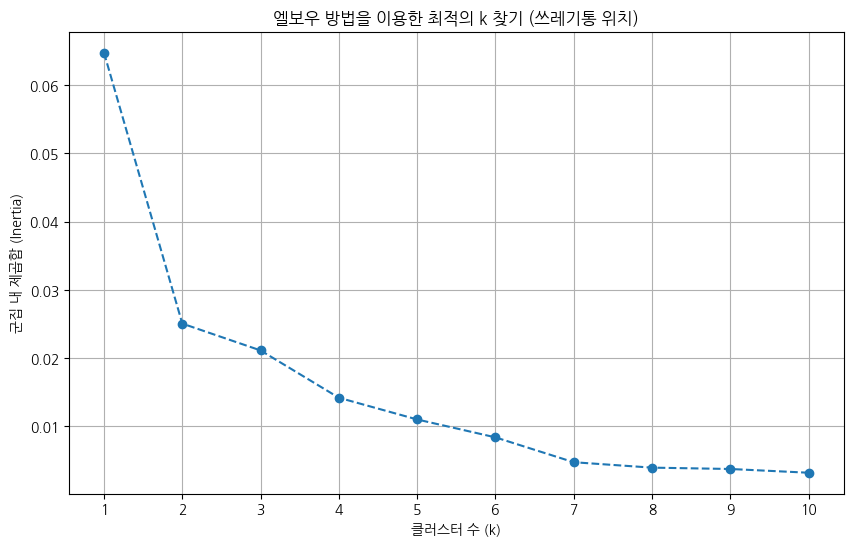

엘보우 그래프를 보고 적절한 클러스터 수(k)를 입력하세요 (예: 5, 기본값: 5): 5

선택된 클러스터 수 (k): 5

[ 클러스터링 결과 (클러스터 레이블 추가된 데이터 - 상위 5개 행) ]
    설치동                     설치주소             상세위치         위도          경도  \
0   대학동          서울특별시 관악구 관악로 1         서울대학교 정문  37.458115  126.952161   
1   대학동          서울특별시 관악구 관악로 1         서울대학교 정문  37.458115  126.952161   
2   청룡동        서울특별시 관악구 관악로 133        건영6차아파트 앞  37.477078  126.951848   
3  낙성대동  서울특별시 관악구 관악구 신림동 147-2  관악서울대학교 치과병원 부근  37.486828  126.928267   
4  낙성대동  서울특별시 관악구 관악구 신림동 147-2  관악서울대학교 치과병원 부근  37.486828  126.928267   

                   지오코딩_주소  cluster  
0          서울특별시 관악구 관악로 1        1  
1          서울특별시 관악구 관악로 1        1  
2        서울특별시 관악구 관악로 133        1  
3  서울특별시 관악구 관악구 신림동 147-2        2  
4  서울특별시 관악구 관악구 신림동 147-2        2  

[ 클러스터 중심점 (Centroids) ]
          위도          경도
0  37.482636  126.908993
1  37.478390  126.952704
2  37.484655  126.928785
3  37.470579  126.982175
4  37.468191  126.926066


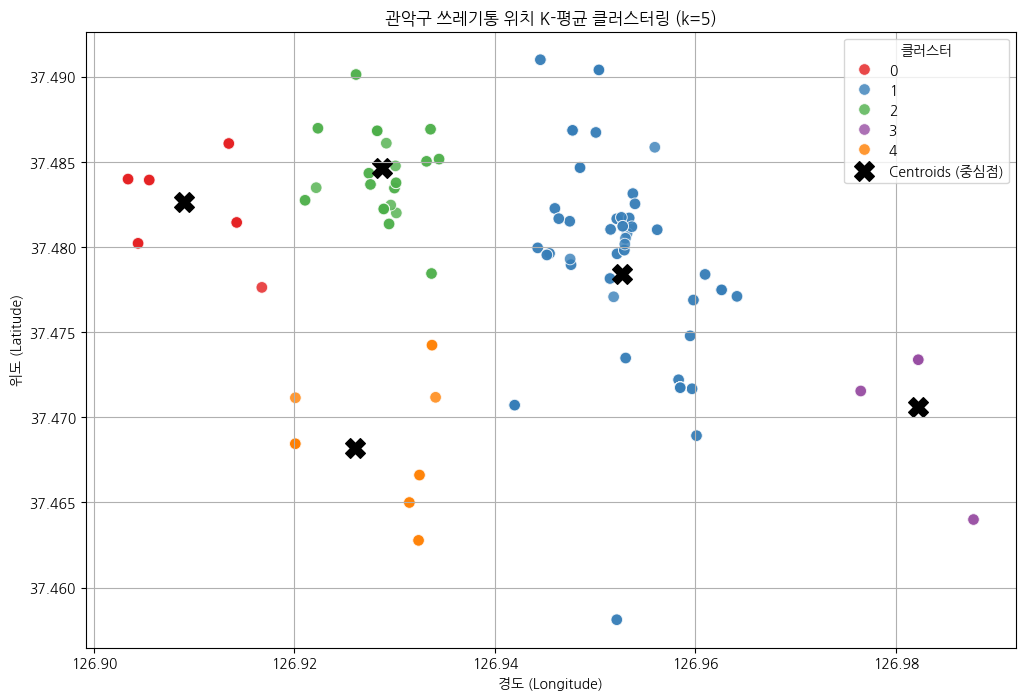


Folium 지도 시각화가 생성되었습니다. (Jupyter Notebook/Colab 환경에서는 바로 표시됩니다)



클러스터링 결과가 다음 파일로 저장되었습니다: /content/drive/MyDrive/머신러닝 데이터셋/서울특별시 관악구 생활폐기물 처리정보_클러스터링완료.csv

--- K-평균 클러스터링 완료 ---


In [69]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import folium # 지도 시각화를 위해 import
from folium.plugins import MarkerCluster # 지도에 마커 클러스터링을 위해 사용

# geopy, folium 라이브러리가 설치되어 있지 않다면 다음 줄의 주석을 해제하고 실행하세요.
# !pip install geopy folium

print("--- K-평균 클러스터링 시작 (정제된 쓰레기통 위치 데이터 사용) ---")

# 파일 경로 설정
base_path = "/content/drive/MyDrive/머신러닝 데이터셋/"
cleaned_bins_file_path = base_path + "서울특별시 관악구 생활폐기물 처리정보_좌표정제완료.csv"
clustered_output_file_path = base_path + "서울특별시 관악구 생활폐기물 처리정보_클러스터링완료.csv"

try:
    # 1. 정제된 쓰레기통 위치 데이터 파일 로드
    try:
        df_bins_cleaned = pd.read_csv(cleaned_bins_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df_bins_cleaned = pd.read_csv(cleaned_bins_file_path, encoding='cp949')
        except UnicodeDecodeError:
            df_bins_cleaned = pd.read_csv(cleaned_bins_file_path, encoding='euc-kr')

    print(f"\n[ {cleaned_bins_file_path} ] 파일 로드 완료.")
    print(f"데이터 개수: {len(df_bins_cleaned)}")
    print("데이터 샘플 (상위 3개 행):")
    print(df_bins_cleaned.head(3))

    # 위도, 경도 컬럼 결측치 재확인 (없어야 함)
    if df_bins_cleaned[['위도', '경도']].isnull().any().any():
        print("\n!!! 경고: '위도' 또는 '경도' 컬럼에 결측치가 있습니다. 클러스터링 전에 처리해야 합니다. !!!")
        # 필요시 다시 한번 결측치 제거
        # df_bins_cleaned.dropna(subset=['위도', '경도'], inplace=True)
        # print(f"결측치 제거 후 데이터 개수: {len(df_bins_cleaned)}")

    # 2. 클러스터링에 사용할 특성 (위도, 경도)
    X = df_bins_cleaned[['위도', '경도']].copy() # .copy()로 경고 방지

    # 3. 적절한 클러스터 수(k) 찾기 (Elbow Method)
    inertia = []
    k_range = range(1, 11) # 테스트할 k값의 범위 (예: 1~10)

    for k_val in k_range:
        kmeans_elbow = KMeans(n_clusters=k_val, init='k-means++', random_state=42, n_init='auto')
        kmeans_elbow.fit(X)
        inertia.append(kmeans_elbow.inertia_)

    # Elbow Method 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.title('엘보우 방법을 이용한 최적의 k 찾기 (쓰레기통 위치)')
    plt.xlabel('클러스터 수 (k)')
    plt.ylabel('군집 내 제곱합 (Inertia)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # 사용자가 그래프를 보고 k값을 선택하거나, 프로젝트의 목표에 따라 k값 결정
    # 예시: 그래프에서 k=5 또는 k=6 지점에서 기울기가 완만해지는 것을 관찰했다고 가정
    # 실제로는 출력된 그래프를 보고 판단해야 합니다.
    try:
        optimal_k_input = input(f"엘보우 그래프를 보고 적절한 클러스터 수(k)를 입력하세요 (예: 5, 기본값: 5): ")
        optimal_k = int(optimal_k_input) if optimal_k_input else 5
    except ValueError:
        print("잘못된 입력입니다. 기본값 k=5로 설정합니다.")
        optimal_k = 5

    print(f"\n선택된 클러스터 수 (k): {optimal_k}")

    # 4. K-평균 클러스터링 모델 학습
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
    df_bins_cleaned['cluster'] = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_ # 클러스터 중심점

    print("\n[ 클러스터링 결과 (클러스터 레이블 추가된 데이터 - 상위 5개 행) ]")
    print(df_bins_cleaned.head())
    print("\n[ 클러스터 중심점 (Centroids) ]")
    print(pd.DataFrame(centroids, columns=['위도', '경도']))

    # 5. 클러스터링 결과 시각화
    # 5-1. Matplotlib을 이용한 산점도 시각화
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='경도', y='위도', hue='cluster', data=df_bins_cleaned, palette='Set1', s=70, alpha=0.8, legend='full')
    plt.scatter(centroids[:, 1], centroids[:, 0], s=200, c='black', marker='X', label='Centroids (중심점)')
    plt.title(f'관악구 쓰레기통 위치 K-평균 클러스터링 (k={optimal_k})')
    plt.xlabel('경도 (Longitude)')
    plt.ylabel('위도 (Latitude)')
    plt.legend(title='클러스터')
    plt.grid(True)
    plt.show()

    # 5-2. Folium을 이용한 지도 시각화
    # 관악구 중심부의 위도, 경도 (예: 관악구청)
    map_center_lat = df_bins_cleaned['위도'].mean()
    map_center_lon = df_bins_cleaned['경도'].mean()
    gwanak_map = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=13)

    # 클러스터별 색상 지정 (k값에 따라 조절 필요)
    # 더 많은 클러스터가 필요하면 색상 리스트를 확장해야 합니다.
    cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
                      'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
                      'darkpurple', 'pink', 'lightblue', 'lightgreen']

    # 각 쓰레기통 위치를 지도에 마커로 추가
    for idx, row in df_bins_cleaned.iterrows():
        folium.CircleMarker(
            location=[row['위도'], row['경도']],
            radius=5,
            color=cluster_colors[row['cluster'] % len(cluster_colors)],
            fill=True,
            fill_color=cluster_colors[row['cluster'] % len(cluster_colors)],
            fill_opacity=0.7,
            tooltip=f"설치주소: {row['설치주소']}<br>상세위치: {row['상세위치']}<br>클러스터: {row['cluster']}"
        ).add_to(gwanak_map)

    # 클러스터 중심점을 지도에 마커로 추가
    for i, centroid_loc in enumerate(centroids):
        folium.Marker(
            location=[centroid_loc[0], centroid_loc[1]],
            popup=f'클러스터 {i} 중심',
            icon=folium.Icon(color='black', icon='info-sign', prefix='fa')
        ).add_to(gwanak_map)

    print("\nFolium 지도 시각화가 생성되었습니다. (Jupyter Notebook/Colab 환경에서는 바로 표시됩니다)")
    # Colab이나 Jupyter Notebook 환경에서는 gwanak_map을 그냥 실행하면 지도가 보입니다.
    # 만약 HTML 파일로 저장하고 싶다면:
    # map_file_path = base_path + "gwanak_waste_bins_clustered_map.html"
    # gwanak_map.save(map_file_path)
    # print(f"지도 시각화가 다음 파일로 저장되었습니다: {map_file_path}")
    display(gwanak_map) # Colab에서 바로 지도를 표시하기 위해 display 사용


    # 6. 클러스터링 결과 파일로 저장
    try:
        df_bins_cleaned.to_csv(clustered_output_file_path, index=False, encoding='utf-8-sig')
        print(f"\n클러스터링 결과가 다음 파일로 저장되었습니다: {clustered_output_file_path}")
    except Exception as e:
        print(f"\n클러스터링 결과 파일 저장 중 오류 발생: {e}")


except FileNotFoundError:
    print(f"!!! 파일 없음: {cleaned_bins_file_path} - 경로를 확인해주세요. 이전 단계에서 파일이 정상적으로 저장되었는지 확인 필요합니다.!!!")
except Exception as e:
    print(f"!!! 처리 중 오류 발생: {e} !!!")

print("\n--- K-평균 클러스터링 완료 ---")



In [70]:
import pandas as pd
import numpy as np

print("--- 클러스터링 결과와 인구 데이터 결합 분석 시작 ---")

# 파일 경로 설정
base_path = "/content/drive/MyDrive/머신러닝 데이터셋/"
clustered_bins_file_path = base_path + "서울특별시 관악구 생활폐기물 처리정보_클러스터링완료.csv"
population_file_path = base_path + "서울특별시 관악구_행정동별 인구정보_20240830.csv"

try:
    # 1. 클러스터링 완료된 쓰레기통 데이터 로드
    try:
        df_bins_clustered = pd.read_csv(clustered_bins_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df_bins_clustered = pd.read_csv(clustered_bins_file_path, encoding='cp949')
    print(f"\n[ {clustered_bins_file_path} ] 로드 완료. (데이터 수: {len(df_bins_clustered)})")
    print("클러스터링된 쓰레기통 데이터 샘플:")
    print(df_bins_clustered.head(3))

    # 2. 행정동별 인구 데이터 로드
    try:
        df_population = pd.read_csv(population_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df_population = pd.read_csv(population_file_path, encoding='cp949')
    print(f"\n[ {population_file_path} ] 로드 완료. (데이터 수: {len(df_population)})")
    print("인구 데이터 샘플:")
    print(df_population.head(3))

    # 3. 데이터 병합 준비: 컬럼명 표준화
    # 인구 데이터의 '행정기관' 컬럼을 쓰레기통 데이터의 '설치동'과 일치시키기 위해 이름 변경
    df_population.rename(columns={'행정기관': '설치동'}, inplace=True)
    # 인구수 컬럼명 확인 (이전 분석에서 '인구수(계)'로 확인됨)
    population_col_name = '인구수(계)'

    # 필요한 컬럼만 선택 (설치동, 인구수)
    df_population_simple = df_population[['설치동', population_col_name]].copy()

    # 4. 클러스터별 분석
    # 각 클러스터에 어떤 동들이 포함되어 있고, 각 동의 인구는 얼마인지 확인하기 위해
    # 먼저 쓰레기통 데이터와 인구 데이터를 '설치동' 기준으로 병합합니다.
    df_merged_analysis = pd.merge(df_bins_clustered, df_population_simple, on='설치동', how='left')

    if df_merged_analysis[population_col_name].isnull().any():
        print("\n!!! 경고: 일부 쓰레기통의 '설치동'에 대한 인구 정보를 찾을 수 없습니다. 동 이름을 확인해주세요.")
        print("인구 정보가 없는 '설치동':")
        print(df_merged_analysis[df_merged_analysis[population_col_name].isnull()]['설치동'].unique())

    print("\n[ 각 클러스터별 통계 ]")
    # 클러스터별 쓰레기통 개수
    bins_per_cluster = df_merged_analysis.groupby('cluster').size().rename('쓰레기통_개수')

    # 클러스터별 고유 행정동 목록 및 해당 동들의 총 인구수
    # 주의: 한 행정동이 여러 쓰레기통을 통해 여러 클러스터에 걸쳐 나타날 수 있으나,
    # 아래 방식은 각 클러스터'에 속한 쓰레기통'이 위치한 동들의 인구수를 기준으로 집계합니다.

    # 각 클러스터에 포함된 고유한 동 목록 및 총 인구수 계산
    # 이 방식은 각 쓰레기통이 속한 동의 인구수를 가져오고, 클러스터별로 합산합니다.
    # 만약 한 동에 여러 쓰레기통이 있고 이 쓰레기통들이 같은 클러스터에 있다면,
    # 해당 동의 인구수가 쓰레기통 개수만큼 중복으로 합산될 수 있습니다.
    # 따라서, 각 클러스터가 커버하는 *고유한 동들의 총 인구수*를 계산하는 것이 더 적절합니다.

    cluster_summary_list = []
    for cluster_num in df_merged_analysis['cluster'].unique():
        cluster_data = df_merged_analysis[df_merged_analysis['cluster'] == cluster_num]
        unique_dongs_in_cluster = cluster_data['설치동'].unique()

        # 해당 고유 동들의 인구수 합계 (원본 인구 데이터에서 조회)
        population_of_dongs_in_cluster = df_population_simple[df_population_simple['설치동'].isin(unique_dongs_in_cluster)][population_col_name].sum()

        num_bins_in_cluster = len(cluster_data)

        # 쓰레기통 1개당 담당 인구수 (클러스터가 커버하는 동들의 총 인구수 / 클러스터 내 쓰레기통 수)
        # 인구수가 0이거나 쓰레기통 수가 0인 경우를 대비
        population_per_bin = np.nan
        if num_bins_in_cluster > 0 and population_of_dongs_in_cluster > 0:
            population_per_bin = population_of_dongs_in_cluster / num_bins_in_cluster

        cluster_summary_list.append({
            '클러스터': cluster_num,
            '쓰레기통_개수': num_bins_in_cluster,
            '관련_행정동_수': len(unique_dongs_in_cluster),
            '관련_행정동_목록': ", ".join(unique_dongs_in_cluster),
            '관련_행정동_총인구수': population_of_dongs_in_cluster,
            '쓰레기통_1개당_담당인구수': population_per_bin
        })

    df_cluster_summary = pd.DataFrame(cluster_summary_list).sort_values(by='클러스터').reset_index(drop=True)

    print(df_cluster_summary)

    print("\n--- 해석 ---")
    for index, row in df_cluster_summary.iterrows():
        print(f"\n[클러스터 {row['클러스터']}]")
        print(f"  - 쓰레기통 개수: {row['쓰레기통_개수']}개")
        print(f"  - 관련 행정동: {row['관련_행정동_목록']} (총 {row['관련_행정동_수']}개 동)")
        print(f"  - 관련 행정동 총 인구수: {row['관련_행정동_총인구수']:,}명") # 천단위 콤마
        print(f"  - 쓰레기통 1개당 담당 인구수 (해당 동들 기준): {row['쓰레기통_1개당_담당인구수']:,.0f}명") # 소수점 없이 천단위 콤마

    print("\n--- 클러스터링 결과와 인구 데이터 결합 분석 완료 ---")

    # 분석 결과를 파일로 저장하고 싶다면:
    # output_summary_path = base_path + "관악구_쓰레기통_클러스터_인구분석_요약.csv"
    # df_cluster_summary.to_csv(output_summary_path, index=False, encoding='utf-8-sig')
    # print(f"\n클러스터별 인구 분석 요약 결과가 다음 파일로 저장되었습니다: {output_summary_path}")


except FileNotFoundError as e:
    print(f"!!! 파일 없음 오류: {e.filename} - 경로를 확인해주세요.")
except Exception as e:
    print(f"!!! 처리 중 오류 발생: {e} !!!")


--- 클러스터링 결과와 인구 데이터 결합 분석 시작 ---

[ /content/drive/MyDrive/머신러닝 데이터셋/서울특별시 관악구 생활폐기물 처리정보_클러스터링완료.csv ] 로드 완료. (데이터 수: 190)
클러스터링된 쓰레기통 데이터 샘플:
   설치동               설치주소       상세위치         위도          경도  \
0  대학동    서울특별시 관악구 관악로 1   서울대학교 정문  37.458115  126.952161   
1  대학동    서울특별시 관악구 관악로 1   서울대학교 정문  37.458115  126.952161   
2  청룡동  서울특별시 관악구 관악로 133  건영6차아파트 앞  37.477078  126.951848   

             지오코딩_주소  cluster  
0    서울특별시 관악구 관악로 1        1  
1    서울특별시 관악구 관악로 1        1  
2  서울특별시 관악구 관악로 133        1  

[ /content/drive/MyDrive/머신러닝 데이터셋/서울특별시 관악구_행정동별 인구정보_20240830.csv ] 로드 완료. (데이터 수: 21)
인구 데이터 샘플:
   행정기관  인구수(계)  인구수(남)  인구수(여)  구성비(계)  구성비(남)  구성비(여)     성비    세대수  세대당인구
0  보라매동   23563   11571   11992    4.90    2.41    2.50  96.49  13032   1.81
1   청림동   14628    7012    7616    3.04    1.46    1.58  92.07   6389   2.29
2   성현동   28049   13526   14523    5.84    2.81    3.02  93.14  12274   2.29

[ 각 클러스터별 통계 ]
   클러스터  쓰레기통_개수  관련_행정동_수                       